In [9]:
from sklearn.linear_model import LinearRegression
from random import randint, uniform, gauss

In [25]:
C_train = 1000000

alpha = uniform(1.1, 1.2)
X_train = []
y_train = []

for i in range(C_train):
    xi = randint(1, 100)
    sigmai = uniform(0.1, 3)
    new_error = uniform(0.1, 0.3)
    xi1 = gauss(xi, sigmai) * alpha + gauss(0, new_error)
    sigmai1 = ((sigmai ** 2) * (alpha ** 2) + (new_error ** 2)) ** 0.5
    X_train.append([xi, sigmai**2])
    y_train.append([xi1, sigmai1**2])


In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
C_test = 1000

X_test = []
y_test = []

for i in range(C_test):
    xi = randint(1, 100)
    sigmai = uniform(0.1, 3)
    new_error = uniform(0.1, 0.3)
    xi1 = gauss(xi, sigmai) * alpha + gauss(0, new_error)
    sigmai1 = ((sigmai ** 2) * (alpha ** 2) + (new_error ** 2)) ** 0.5
    X_test.append([xi, sigmai**2])
    y_test.append([xi1, sigmai1**2])


In [28]:
y_pred = model.predict(X_test)

score = model.score(X_test, y_test)
print(score * 100, " score\n")
print(alpha, " alpha")
print(model.coef_[0], " alpha_pred")

99.8202560993948  score

1.1754239365490577  alpha
[1.17542702 0.00136811]  alpha_pred


In [29]:
C_iter = 15

x = 10
sigma = 4
res_x = [x]
res_sigma = [sigma**0.5]

for i in range(C_iter):
    nexti = model.predict([[x, sigma]])[0]
    x = nexti[0]
    sigma = max(0, nexti[1])

    res_x.append(x)
    res_sigma.append(sigma**0.5)

x = 10
sigma = 4
need_x = [x]
need_sigma = [sigma**0.5]

for i in range(C_iter):
    new_error = uniform(0.1, 0.3)
    x1 = gauss(x, sigma**0.5) * alpha + gauss(0, new_error)
    sigma1 = (alpha**2 * sigma + new_error**2)
    x = x1
    sigma = sigma1

    need_x.append(x)
    need_sigma.append(sigma**0.5)

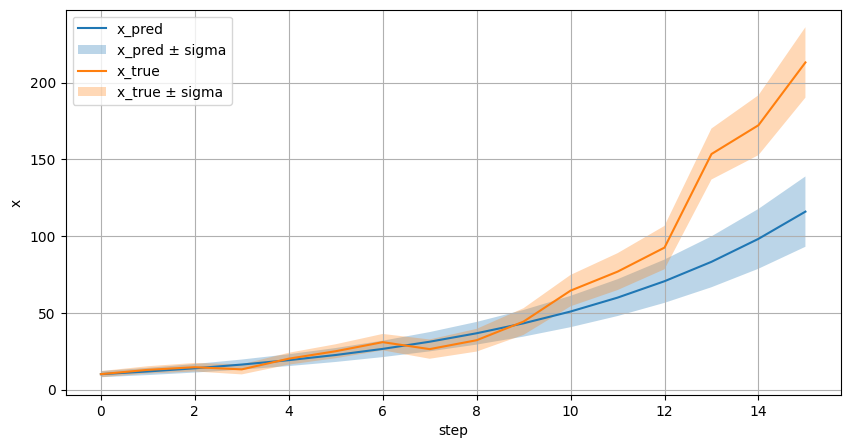

In [30]:
import numpy as np
import matplotlib.pyplot as plt

steps = np.arange(C_iter + 1)

res_x = np.array(res_x)
res_sigma = np.array(res_sigma)
need_x = np.array(need_x)
need_sigma = np.array(need_sigma)

plt.figure(figsize=(10, 5))
plt.xlabel("step")
plt.ylabel("x")
plt.plot(steps, res_x, label="x_pred")
plt.fill_between(steps, res_x - res_sigma, res_x + res_sigma, alpha=0.3, label="x_pred ± sigma")
plt.plot(steps, need_x, label="x_true")
plt.fill_between(steps, need_x - need_sigma, need_x + need_sigma, alpha=0.3, label="x_true ± sigma")
plt.grid()
plt.legend()
plt.show()
